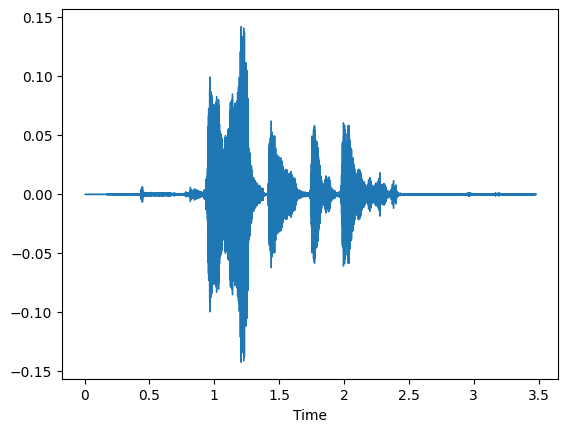

In [29]:
import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load("AI in Speech Processing.mp3")
librosa.display.waveshow(y)

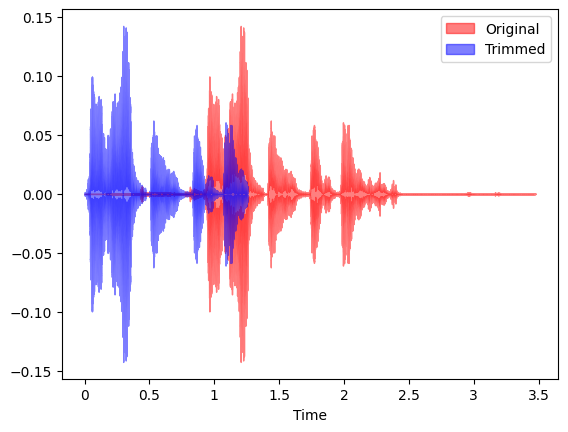

In [12]:
import matplotlib.pyplot as plt
trimmed_audio = librosa.effects.trim(y,top_db=20)
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(y, sr=sr, alpha=0.5, color='r',ax=ax, label='Original')
librosa.display.waveshow(trimmed_audio[0], alpha=0.5, color='b',ax=ax, label='Trimmed')
ax.legend()
ipd.Audio(trimmed_audio[0],rate=sr)


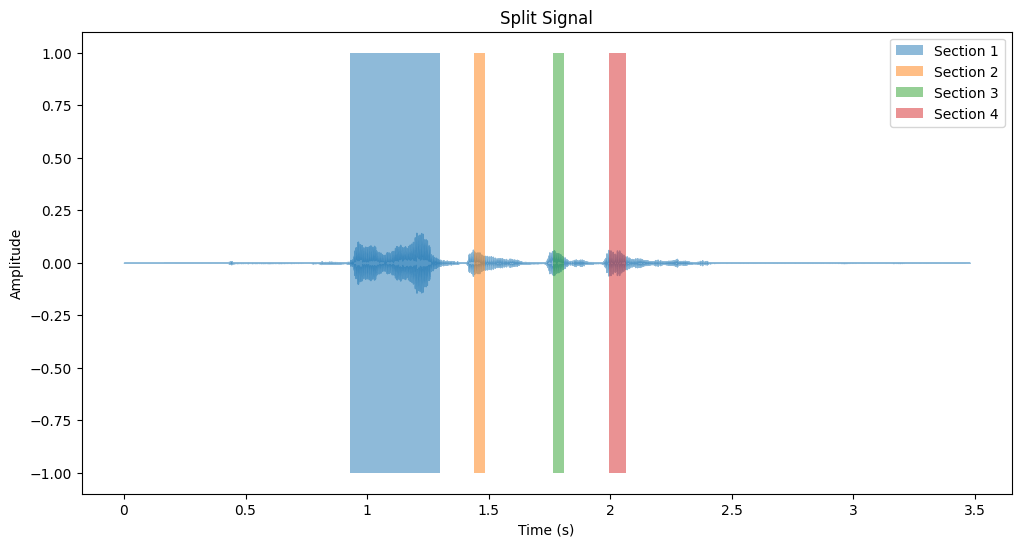

In [13]:
sections = librosa.effects.split(y, top_db=10)

plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

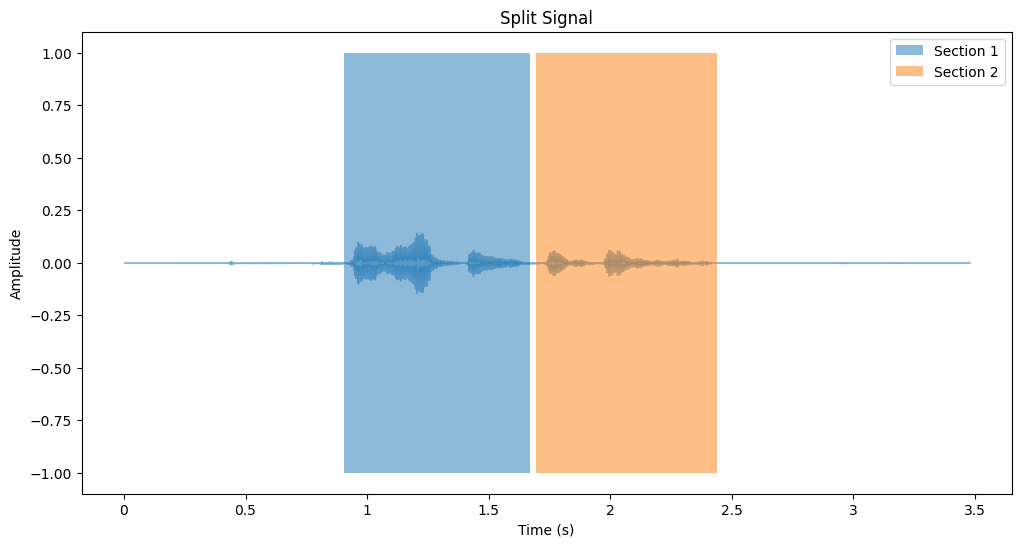

In [14]:
sections = librosa.effects.split(y, top_db=30)

plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

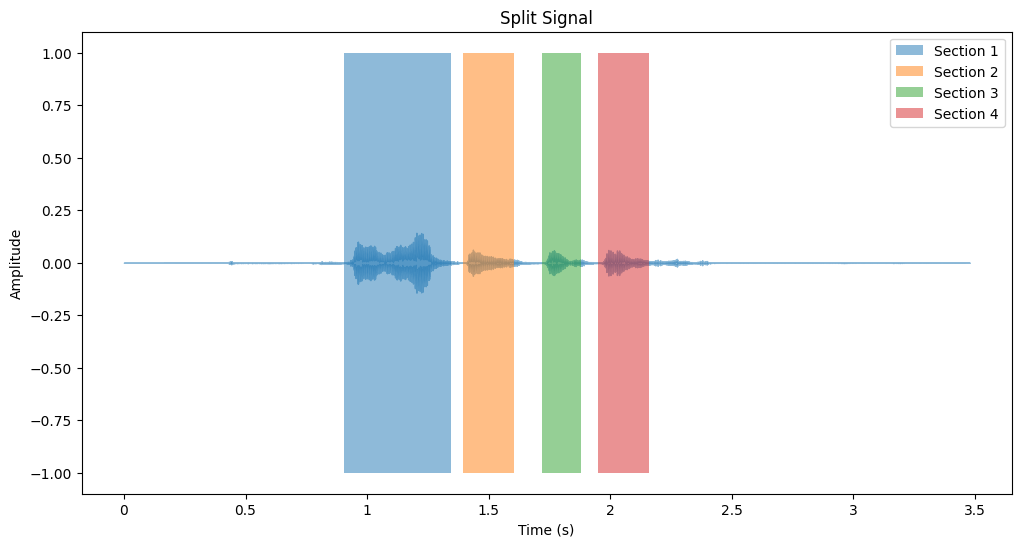

In [15]:
sections = librosa.effects.split(y, top_db=20)

plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

In [48]:
print(sr)

22050


1102


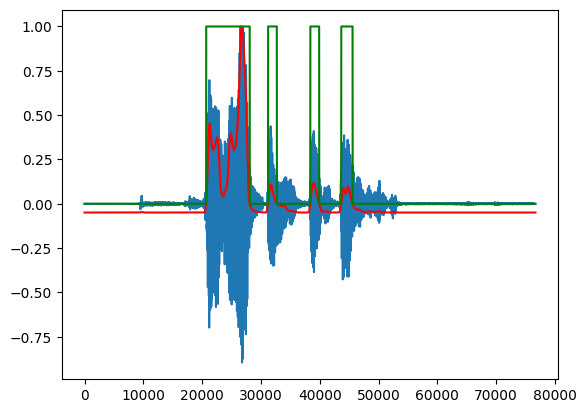

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt 

def calculate_continuous_average_energy(signal, window_size, hop_length):
    energy = np.sum(np.abs(librosa.stft(signal, n_fft=window_size, hop_length=hop_length)) ** 2, axis=0)
    return energy / window_size

def compute_normalized_energy(energy):
    mean_energy = np.mean(energy)
    std_energy = np.std(energy)
    out = (energy - mean_energy) / std_energy
    return out/np.max(out)

def identify_lobes(normalized_energy):
    arr = np.zeros(normalized_energy.shape)
    for i in range(len(normalized_energy)):
        if normalized_energy[i] > 0:
            arr[i] = 1
    return arr

if __name__ == "__main__":
    original_signal, sr = librosa.load(r"C:\Users\esury\OneDrive\Desktop\College\Amrita\6th Sem\Speech Recognition\Lab\AI in Speech Processing.mp3")  
    window_size = int(0.05 * sr)
    print(window_size)
    hop_length = 1

    # Step 1: Calculate Continuous Average Energy
    continuous_energy = calculate_continuous_average_energy(original_signal, window_size, hop_length)

    # Step 2: Compute Normalized Continuous Average Energy
    normalized_energy = compute_normalized_energy(continuous_energy)

    # Step 3: Identify Maxima and Lobe Boundaries
    maxima_indices = identify_lobes(normalized_energy)
    
    plt.plot(original_signal/np.max(original_signal))
    plt.plot(normalized_energy, 'r')
    plt.plot(maxima_indices, 'g')
    

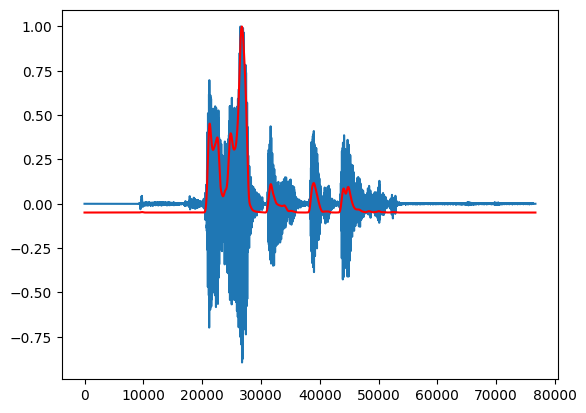

In [7]:
plt.plot(original_signal/np.max(original_signal))
plt.plot(normalized_energy/np.max(normalized_energy),'r')